<a href="https://www.kaggle.com/code/ronit444/credit-card-fraud-detection?scriptVersionId=206003023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
224112,143658.0,2.341509,-1.332284,-1.177766,-1.638736,-0.998856,-0.520045,-1.079313,-0.173964,-1.161730,...,-0.202762,-0.099289,0.236976,0.443350,-0.120679,-0.175987,0.001721,-0.049178,10.00,0
272135,164930.0,-1.004660,2.131454,-2.334016,-0.510827,1.622845,-0.936754,0.912180,0.615165,-1.379262,...,0.153563,0.222820,-0.396958,0.055039,0.240127,0.634347,-0.302808,0.050491,0.76,0
69142,53289.0,1.067984,0.160963,1.013804,2.348961,-0.527923,0.207593,-0.447620,0.283889,-0.411088,...,-0.046787,-0.385169,0.037886,-0.089447,0.142242,-0.141438,-0.004079,0.024695,38.62,0
91618,63555.0,1.196917,0.499183,0.090995,1.178233,0.002551,-1.018031,0.514884,-0.275699,-0.384463,...,0.070449,0.314455,-0.055089,0.639272,0.723545,-0.301145,0.012101,0.013849,1.48,0
182240,125316.0,-0.806757,1.017803,2.803064,3.990613,0.158066,2.242116,-0.565163,0.628850,-0.893195,...,0.079941,0.585703,-0.207384,0.033856,0.066054,0.537135,0.348961,-0.017025,7.14,0


In [5]:
df.drop([0])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df['Amount'].value_counts()

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64

In [10]:
x= df.drop(columns=['Class'])
y = df.iloc[:,-1]

In [11]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler = StandardScaler()
new_x_train = scaler.fit_transform(x_train)
new_x_test = scaler.transform(x_test)

In [15]:
print(new_x_train.shape)
print(new_x_test.shape)

(227845, 30)
(56962, 30)


In [16]:
smote = SMOTE(random_state=42)
new_x_train_resampled, y_train_resampled = smote.fit_resample(new_x_train, y_train)

In [17]:
print(new_x_train_resampled.shape)
print(y_train_resampled.shape)

(454902, 30)
(454902,)


In [18]:
model = Sequential()

model.add(Dense(32,activation = 'relu', input_dim= 30))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(new_x_train_resampled,y_train_resampled, epochs = 5 , validation_split=0.2)

Epoch 1/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9790 - loss: 0.0604 - val_accuracy: 0.9993 - val_loss: 0.0076
Epoch 2/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9984 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 3/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 4/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/5
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9999 - val_loss: 0.0021


In [21]:
y_log = model.predict(new_x_test)
y_pred = np.where(y_log>0.5,1,0)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9988939995084443

In [23]:
history.history

{'accuracy': [0.9916437864303589,
  0.9984914064407349,
  0.9988980889320374,
  0.9991756677627563,
  0.9991976022720337],
 'loss': [0.025954728946089745,
  0.006214276887476444,
  0.004619177896529436,
  0.0034732939675450325,
  0.003099874360486865],
 'val_accuracy': [0.9992745518684387,
  1.0,
  0.9993405342102051,
  1.0,
  0.9998900890350342],
 'val_loss': [0.007560365367680788,
  0.0024459525011479855,
  0.0034444984048604965,
  0.0012310831807553768,
  0.0021005463786423206]}

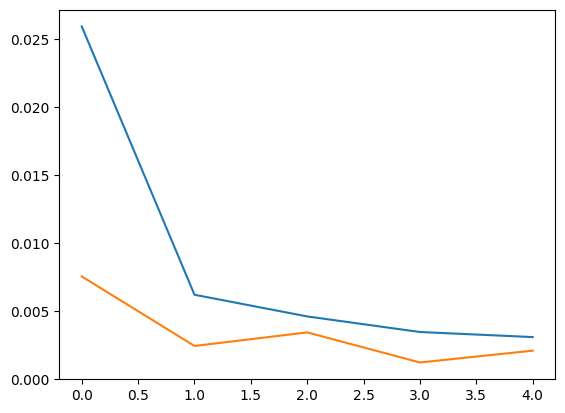

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

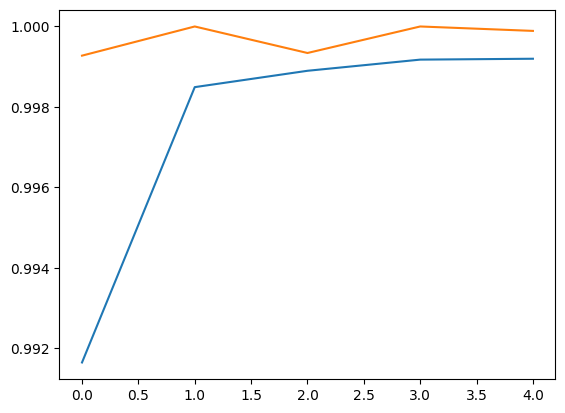

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])